In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

# Data loading and cleaning

## Loading

In [3]:
df_list_PL = [pd.read_csv('../data/PREMIER_LEAGUE/PL_'+str(year)+'.csv') for year in np.arange(2013,2019)]
df_list_E1 = [pd.read_csv('../data/CHAMPIONSHIP/E1_'+str(year)+'.csv') for year in np.arange(2013,2019)]
df_list_E2 = [pd.read_csv('../data/LEAGUE1/E2_'+str(year)+'.csv') for year in np.arange(2013,2019)]
df_list = df_list_PL + df_list_E1 + df_list_E2
data = pd.concat(df_list, ignore_index=True, sort=False)

In [5]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,18/08/12,Arsenal,Sunderland,0.0,0.0,D,0.0,0.0,D,...,2.05,23.0,-1.25,2.02,1.96,1.96,1.91,1.44,4.72,8.71
1,E0,18/08/12,Fulham,Norwich,5.0,0.0,H,2.0,0.0,H,...,1.92,21.0,-0.50,1.83,1.80,2.14,2.09,1.84,3.75,4.75
2,E0,18/08/12,Newcastle,Tottenham,2.0,1.0,H,0.0,0.0,D,...,1.92,23.0,0.00,1.93,1.88,2.03,1.97,2.83,3.35,2.72
3,E0,18/08/12,QPR,Swansea,0.0,5.0,A,0.0,1.0,A,...,1.73,22.0,-0.25,1.80,1.75,2.21,2.13,2.00,3.53,4.15
4,E0,18/08/12,Reading,Stoke,1.0,1.0,D,0.0,1.0,A,...,1.67,24.0,-0.25,2.07,2.01,1.91,1.86,2.47,3.30,3.22


## Cleaning

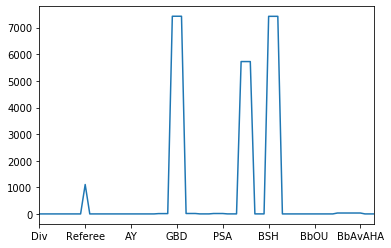

In [6]:
data.isnull().sum().plot()

In [7]:
# Feature with more than 10% of NaN
NaN_feature = data.isnull().sum()[data.isnull().sum()>0.10*len(data)].index

# Drop them
data.drop(columns = NaN_feature, inplace=True)

In [8]:
# Drop row with nan
data.dropna(axis=0,how='any',inplace=True)

data.isnull().sum().sum()

0

# Exploratory Data Analysis

## Description of variables

In [13]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8826 entries, 0 to 8907
Data columns (total 64 columns):
Div         8826 non-null object
Date        8826 non-null object
HomeTeam    8826 non-null object
AwayTeam    8826 non-null object
FTHG        8826 non-null float64
FTAG        8826 non-null float64
FTR         8826 non-null object
HTHG        8826 non-null float64
HTAG        8826 non-null float64
HTR         8826 non-null object
HS          8826 non-null float64
AS          8826 non-null float64
HST         8826 non-null float64
AST         8826 non-null float64
HF          8826 non-null float64
AF          8826 non-null float64
HC          8826 non-null float64
AC          8826 non-null float64
HY          8826 non-null float64
AY          8826 non-null float64
HR          8826 non-null float64
AR          8826 non-null float64
B365H       8826 non-null float64
B365D       8826 non-null float64
B365A       8826 non-null float64
BWH         8826 non-null float64
BWD         882


Key to results data:

- Div = League Division
- Date = Match Date (dd/mm/yy)
- HomeTeam = Home Team
- AwayTeam = Away Team
- FTHG and HG = Full Time Home Team Goals
- FTAG and AG = Full Time Away Team Goals
- FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
- HTHG = Half Time Home Team Goals
- HTAG = Half Time Away Team Goals
- HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics 

- HS = Home Team Shots
- AS = Away Team Shots
- HST = Home Team Shots on Target
- AST = Away Team Shots on Target
- HC = Home Team Corners
- AC = Away Team Corners
- HY = Home Team Yellow Cards
- AY = Away Team Yellow Cards
- HR = Home Team Red Cards
- AR = Away Team Red Cards


Home win, Draw, or Away win betting odds:

- B365H = Bet365 home win odds
- B365D = Bet365 draw odds
- B365A = Bet365 away win odds
- BWH = Bet&Win home win odds
- BWD = Bet&Win draw odds
- BWA = Bet&Win away win odds
- IWH = Interwetten home win odds
- IWD = Interwetten draw odds
- IWA = Interwetten away win odds
- LBH = Ladbrokes home win odds
- LBD = Ladbrokes draw odds
- LBA = Ladbrokes away win odds
- PSH = Pinnacle home win odds
- PSD = Pinnacle draw odds
- PSA = Pinnacle away win odds
- VCH = VC Bet home win odds
- VCD = VC Bet draw odds
- VCA = VC Bet away win odds
- WHH = William Hill home win odds
- WHD = William Hill draw odds
- WHA = William Hill away win odds
- PSCH = Unknown bookie home win odds
- PSCD = Unknown bookie draw odds
- PSCA = Unknown bookie away win odds



- Bb1X2 = Number of BetBrain bookmakers used to calculate match odds averages and maximums
- BbMxH = Betbrain maximum home win odds
- BbAvH = Betbrain average home win odds
- BbMxD = Betbrain maximum draw odds
- BbAvD = Betbrain average draw win odds
- BbMxA = Betbrain maximum away win odds
- BbAvA = Betbrain average away win odds

goals betting odds:

- BbOU = Number of BetBrain bookmakers used to calculate over/under 2.5 goals (total goals) averages and maximums
- BbMx>2.5 = Betbrain maximum over 2.5 goals
- BbAv>2.5 = Betbrain average over 2.5 goals
- BbMx<2.5 = Betbrain maximum under 2.5 goals
- BbAv<2.5 = Betbrain average under 2.5 goals

Asian handicap betting odds:

- BbAH = Number of BetBrain bookmakers used to Asian handicap averages and maximums
- BbAHh = Betbrain size of handicap (home team)
- BbMxAHH = Betbrain maximum Asian handicap home team odds
- BbAvAHH = Betbrain average Asian handicap home team odds
- BbMxAHA = Betbrain maximum Asian handicap away team odds
- BbAvAHA = Betbrain average Asian handicap away team odds

In [10]:
data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
count,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,...,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000,8826.000000
mean,1.459551,1.164287,0.635962,0.505665,13.287673,10.803875,5.022774,4.096760,10.737933,11.376388,...,1.879688,22.306934,-0.276569,1.994662,1.931123,1.986235,1.923235,2.582182,3.790343,4.071720
std,1.235640,1.103062,0.805459,0.710122,5.064777,4.429869,2.737846,2.368858,3.480823,3.637383,...,0.228336,4.808532,0.570114,0.145208,0.134879,0.144453,0.133813,1.217281,0.804906,2.603657
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.400000,9.000000,-2.750000,1.600000,1.520000,1.580000,1.540000,1.080000,2.820000,1.160000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,9.000000,...,1.730000,18.000000,-0.500000,1.890000,1.830000,1.880000,1.830000,1.870000,3.400000,2.640000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,5.000000,4.000000,11.000000,11.000000,...,1.840000,22.000000,-0.250000,1.990000,1.920000,1.980000,1.920000,2.290000,3.560000,3.375000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,13.000000,7.000000,5.000000,13.000000,14.000000,...,1.980000,26.000000,0.000000,2.090000,2.020000,2.080000,2.010000,2.870000,3.850000,4.550000
max,8.000000,8.000000,6.000000,4.000000,43.000000,35.000000,20.000000,20.000000,26.000000,26.000000,...,4.070000,37.000000,2.000000,2.690000,2.500000,2.800000,2.690000,18.000000,15.000000,30.000000


In [15]:
data.describe(include=['O'])

,Div,Date,HomeTeam,AwayTeam,FTR,HTR
count,8826,8826,8826,8826,8826,8826
unique,3,1084,82,82,3,3
top,E1,26/12/13,Blackburn,Preston,H,D
freq,3295,34,138,138,3838,3714


In [2]:
SPO_df = pd.read_csv('/Users/antoinemarchal/Desktop/MasterThesis/Code/Data/Clean/Backtests/SPO/SPO_df.csv', index_col=[0,1,2])

In [7]:
MPO_df = pd.read_csv('/Users/antoinemarchal/Desktop/MasterThesis/Code/Data/Clean/Backtests/MPO/MPO_df.csv', index_col=[0,1,2])

In [10]:
SPO_df = pd.read_csv('/Users/antoinemarchal/Desktop/MasterThesis/Code/Data/Clean/Backtests/SPO_TurnoverCons/SPO_df_TurnoverCons.csv', index_col=[0,1,2])

In [13]:
MPO_df = pd.read_csv('/Users/antoinemarchal/Desktop/MasterThesis/Code/Data/Clean/Backtests/MPO_TurnoverCons/MPO_df_TurnoverCons.csv', index_col=[0,1,2])

In [4]:
def Pareto(df, cost=True):

    if cost:
        R = 'R_p_'
        sig = 'sig_p'
    else:
        sig = 'sig_p_NoCost'
        R = 'R_p_NoCost_'

    is_pareto_df = df.sort_values(sig, ascending=False).reset_index(drop=True)

    is_pareto = lambda i: is_pareto_df.loc[i, R] >= is_pareto_df[R][i:].max()

    is_pareto_df['is_pareto'] = [is_pareto(i) for i in range(len(is_pareto_df))]

    pareto_df = df.sort_values(sig, ascending=False)[is_pareto_df['is_pareto'].values]

    pareto_df['SR'] = pareto_df[R] / pareto_df[sig]
    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df[sig], df[R])
    plt.plot(pareto_df[sig], pareto_df[R], 'r.-', label='Pareto optimal frontier')

    plt.legend()
    plt.xlabel(r'$\sigma_p$')
    plt.ylabel(r'$R_p$')
    plt.xlim([0, 0.18])
    plt.ylim([0, 0.15])
    plt.title('Portfolio return as a function of portfolio volatility')

    return pareto_df

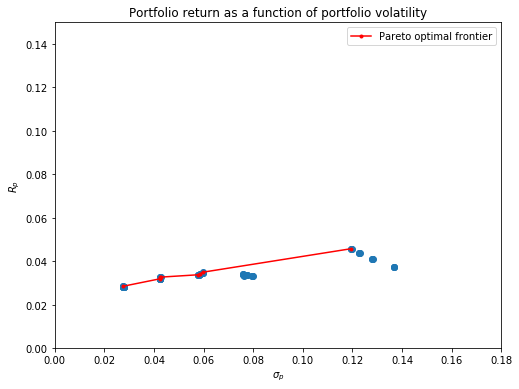

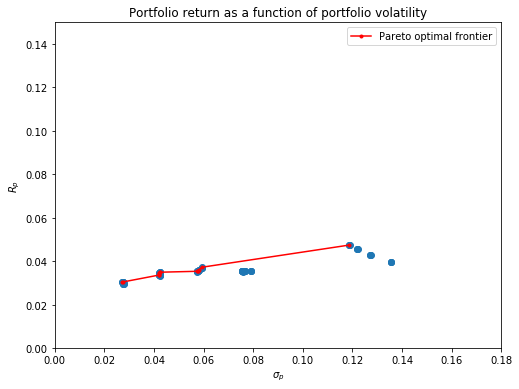

In [11]:
SPO_pareto_df = Pareto(SPO_df)
SPO_pareto_df_NoCost = Pareto(SPO_df,cost=False)

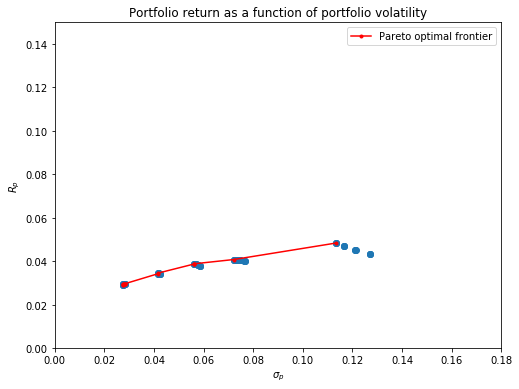

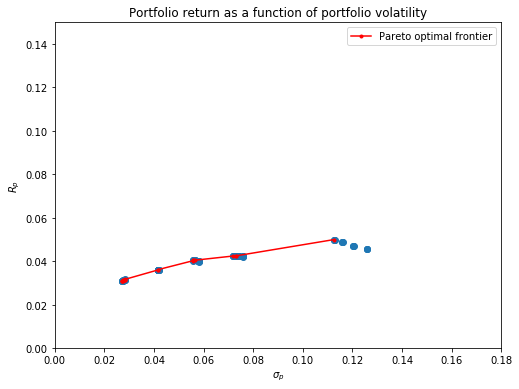

In [14]:
MPO_pareto_df = Pareto(MPO_df)
MPO_pareto_df_NoCost = Pareto(MPO_df,cost=False)

In [15]:
MPO_pareto_df

R_p_     sig_p  Turnover_  \
gammma_risk gamma_tcost gamma_hcost                                  
2           7           150          0.048450  0.113348   2.432893   
5           7           50           0.040877  0.072181   2.410463   
8           7           150          0.038892  0.056028   2.392463   
                        100          0.038892  0.056028   2.392465   
                        50           0.038766  0.055999   2.393383   
14          7           150          0.034675  0.041766   2.371235   
            6           150          0.034370  0.041673   2.448471   
30          4           50           0.029752  0.028263   2.511696   
                        150          0.029693  0.028219   2.511358   
                        100          0.029691  0.028218   2.511358   
            5           50           0.029616  0.027830   2.484018   
            7           50           0.029562  0.027475   2.330541   
                        150          0.029552  0.027369   2.325249   
            6           150          0.029331  0.027328   2.417197   
                        100          0.029329  0.027328   2.417199   

                                     R_p_NoCost_  sig_p_NoCost        SR  
gammma_risk gamma_tcost gamma_hcost                                       
2           7           150             0.050071      0.112689  0.427448  
5           7           50              0.042477      0.071814  0.566307  
8           7           150             0.040455      0.055764  0.694147  
                        100             0.040455      0.055764  0.694148  
                        50              0.040331      0.055735  0.692263  
14          7           150             0.036212      0.041587  0.830217  
            6           150             0.036047      0.041484  0.824755  
30          4           50              0.031712      0.028135  1.052684  
                        150             0.031625      0.028093  1.052259  
                        100             0.031623      0.028093  1.052193  
            5           50              0.031428      0.027716  1.064162  
            7           50              0.031080      0.027379  1.075933  
                        150             0.031039      0.027275  1.079757  
            6           150             0.030963      0.027227  1.073288  
                        100             0.030961      0.027227  1.073225